In [10]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
os.path.join('thyroid+disease','Merged_datafiles')
df=pd.read_csv('C:\\Users\\new\\OneDrive\\Desktop\\Volatile2\\thyroid+disease\\Merged_datafiles')

In [5]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Diagnosis
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S


In [6]:
df['T4U'].unique()

array(['?', '1.02', '1.06', '0.94', '1.08', '0.84', '1.13', '1.07',
       '0.87', '0.89', '0.62', '0.91', '0.68', '1', '1.38', '0.79',
       '0.95', '1.57', '0.92', '1.48', '1.1', '0.7', '1.01', '1.05',
       '0.96', '0.78', '1.4', '0.66', '0.86', '0.76', '0.9', '1.16',
       '1.12', '0.98', '1.04', '1.26', '0.83', '0.97', '0.93', '0.88',
       '0.73', '1.29', '1.3', '0.75', '0.8', '1.83', '1.03', '0.61',
       '1.44', '1.18', '0.59', '0.81', '0.64', '1.2', '0.82', '1.19',
       '0.99', '1.56', '1.22', '0.71', '1.32', '0.67', '0.32', '1.11',
       '0.85', '0.52', '1.15', '1.21', '0.77', '0.69', '1.51', '1.33',
       '0.55', '1.45', '1.24', '1.79', '0.72', '1.73', '1.27', '1.68',
       '1.09', '1.43', '0.35', '0.3', '1.28', '0.2', '1.41', '1.14',
       '0.53', '1.52', '1.23', '0.74', '1.53', '1.62', '1.66', '0.4',
       '1.86', '1.59', '0.29', '0.34', '1.17', '1.76', '0.57', '0.63',
       '1.71', '0.31', '0.49', '1.31', '1.34', '0.5', '1.75', '1.36',
       '0.36', '1.42', 

In [14]:
df.shape

(11972, 30)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        11972 non-null  object
 1   sex                        11972 non-null  object
 2   on_thyroxine               11972 non-null  object
 3   query_on_thyroxine         11972 non-null  object
 4   on_antithyroid_medication  11972 non-null  object
 5   sick                       11972 non-null  object
 6   pregnant                   11972 non-null  object
 7   thyroid_surgery            11972 non-null  object
 8   I131_treatment             11972 non-null  object
 9   query_hypothyroid          11972 non-null  object
 10  query_hyperthyroid         11972 non-null  object
 11  lithium                    11972 non-null  object
 12  goitre                     11972 non-null  object
 13  tumor                      11972 non-null  object
 14  hypopi

## NAN values

In [74]:
nan_cols=[i[:i.find(' =')] for i in [f'{i} = {df[i].unique()}' for i in df.columns if '?' in df[i].unique()]]
nan_cols

['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [35]:

#Calculating total nan values from all columns 
q=[]
for j in nan_cols:
    k=df[j].value_counts().sort_values(ascending=False).reset_index()
    q.append([f"{j} :{k['count'][i]}" for i in range(len(k[j])) if k[j][i]=='?'])
q

[['age :1'],
 ['sex :417'],
 ['TSH :1126'],
 ['T3 :3189'],
 ['TT4 :626'],
 ['T4U :1106'],
 ['FTI :1097'],
 ['TBG :11623']]

In [30]:
df.shape

(11972, 30)

In [69]:
d=dict()
d={i.strip():int(j) for i,j in [i[0].split(':')for i in q]}
d

{'age': 1,
 'sex': 417,
 'TSH': 1126,
 'T3': 3189,
 'TT4': 626,
 'T4U': 1106,
 'FTI': 1097,
 'TBG': 11623}

C:\Users\new\AppData\Local\Temp\ipykernel_11288\666181727.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parameters, y=values, palette='viridis')


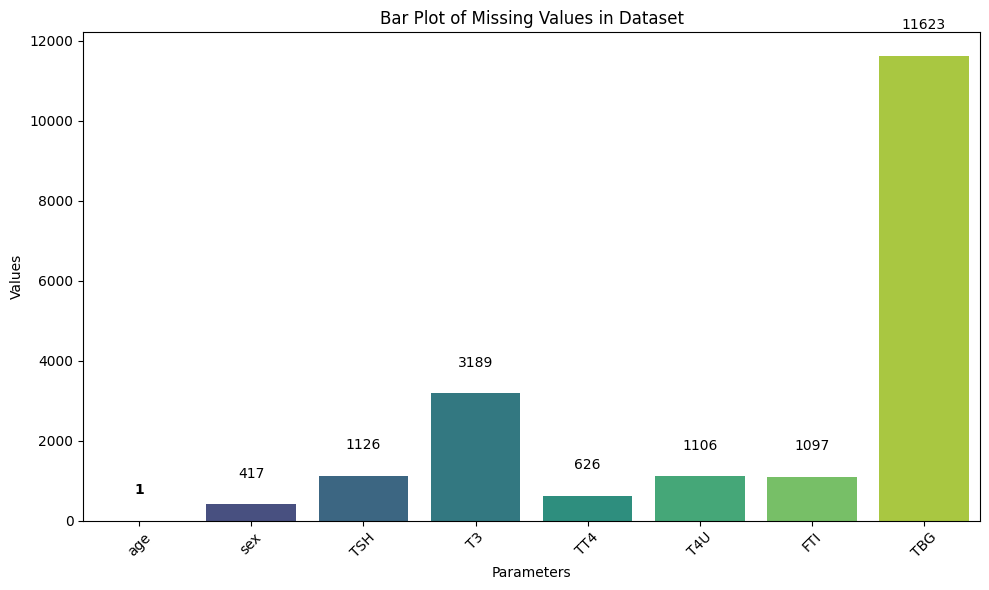

In [68]:
# Extract keys and values
parameters = list(d.keys())
values = list(d.values())

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=parameters, y=values, palette='viridis')

# Label the values on the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.05 * max(values), f'{value}', ha='center', va='bottom',
             fontweight='bold' if parameters[i] == 'age' else 'normal')

# Add title and labels
plt.title('Bar Plot of Missing Values in Dataset')
plt.xlabel('Parameters')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [76]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Diagnosis
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        11972 non-null  object
 1   sex                        11972 non-null  object
 2   on_thyroxine               11972 non-null  object
 3   query_on_thyroxine         11972 non-null  object
 4   on_antithyroid_medication  11972 non-null  object
 5   sick                       11972 non-null  object
 6   pregnant                   11972 non-null  object
 7   thyroid_surgery            11972 non-null  object
 8   I131_treatment             11972 non-null  object
 9   query_hypothyroid          11972 non-null  object
 10  query_hyperthyroid         11972 non-null  object
 11  lithium                    11972 non-null  object
 12  goitre                     11972 non-null  object
 13  tumor                      11972 non-null  object
 14  hypopi

# Duplicates check

In [84]:
df[df.duplicated()]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Diagnosis
98,60,F,t,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.35,t,1.8,t,109,t,0.83,t,131,f,?,other,-
1239,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,31,other,S
2160,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,24,other,-
2211,57,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,23,other,-
2348,65,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,30,other,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11967,70,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.7,f,?,t,155,t,1.05,t,148,f,?,SVI,-
11968,73,M,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,?,t,0.7,t,63,t,0.88,t,72,f,?,other,K
11969,75,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,t,147,t,0.8,t,183,f,?,other,-
11970,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.4,f,?,t,100,t,0.83,t,121,f,?,other,-



These records are not considered duplicates because they contain missing values. This means that these records could potentially represent the same entity or different entities, depending on the nature of the missing data. if same entities then it will be considered as duplicated or else this will not be considered as duplicated

In [83]:
#Duplicates
k=df[df.duplicated()]['age'].index

In [107]:
df.iloc[k]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Diagnosis
98,60,F,t,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.35,t,1.8,t,109,t,0.83,t,131,f,?,other,-
1239,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,31,other,S
2160,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,24,other,-
2211,57,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,23,other,-
2348,65,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,30,other,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11967,70,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.7,f,?,t,155,t,1.05,t,148,f,?,SVI,-
11968,73,M,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,?,t,0.7,t,63,t,0.88,t,72,f,?,other,K
11969,75,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,t,147,t,0.8,t,183,f,?,other,-
11970,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.4,f,?,t,100,t,0.83,t,121,f,?,other,-


In [95]:
i=98
dict(df[i:i+1])

{'age': 98    60
 Name: age, dtype: object,
 'sex': 98    F
 Name: sex, dtype: object,
 'on_thyroxine': 98    t
 Name: on_thyroxine, dtype: object,
 'query_on_thyroxine': 98    f
 Name: query_on_thyroxine, dtype: object,
 'on_antithyroid_medication': 98    f
 Name: on_antithyroid_medication, dtype: object,
 'sick': 98    f
 Name: sick, dtype: object,
 'pregnant': 98    f
 Name: pregnant, dtype: object,
 'thyroid_surgery': 98    f
 Name: thyroid_surgery, dtype: object,
 'I131_treatment': 98    f
 Name: I131_treatment, dtype: object,
 'query_hypothyroid': 98    t
 Name: query_hypothyroid, dtype: object,
 'query_hyperthyroid': 98    f
 Name: query_hyperthyroid, dtype: object,
 'lithium': 98    f
 Name: lithium, dtype: object,
 'goitre': 98    f
 Name: goitre, dtype: object,
 'tumor': 98    f
 Name: tumor, dtype: object,
 'hypopituitary': 98    f
 Name: hypopituitary, dtype: object,
 'psych': 98    f
 Name: psych, dtype: object,
 'TSH_measured': 98    t
 Name: TSH_measured, dtype: object,


In [113]:
df[df.columns][1:2]

['F']

In [114]:
if '3' in '123':
    print(True)

True


In [117]:

h=[]
for i in k:
    a=''
    for j in df.columns:
       a+=list(df[j][i:i+1])[0]
       
    if '?' in a:
        print(a)
    else:
        h.append(i)
        
        

60Ftfffffftfffffft0.35t1.8t109t0.83t131f?other-
68Ffffffffffffffff?f?f?f?f?t31otherS
32Ffffffffffffffff?f?f?f?f?t24other-
57Ffffffffftffffff?f?f?f?f?t23other-
65Ffffffffffffffff?f?f?f?f?t30other-
26Ffffffffffffffff?f?f?f?f?t22other-
63?fffffffffffffff?f?f?f?f?t20other-
71Ffffffffffffffff?f?f?f?f?t21other-
40Ffffffffffffffff?f?f?f?f?t31otherS
21Ffffffffffffffft1.5t2t76t1.03t73f?other-
41Ffffffffffffffft1.3t2.5t125t1.14t109f?SVHC-
23Ffffffffffffffft4.1t2t102f?f?f?other-
46Mfffffffffffffft0.98f?t109t0.91t120f?other-
70Ftffffffffffffft0.16t1.9t175f?f?f?otherL
70Ffffffffffffffft0.72t1.2t61t0.87t70f?SVI-
18Ftffffffffffffft0.03f?t183t1.3t141f?other-
59Ffffffffffffffff?f?t72t0.92t78f?other-
80Ffffffffffffffft2.2t0.6t80t0.7t115f?SVIK
66Fffffffffffftfft0.6t2.2t123t0.93t132f?SVI-
68Mfffffffffffffft2.4t1.6t83t0.89t93f?SVI-
84Fffffffffffftfft1.1t2.2t115t0.95t121f?SVI-
67Ftffffffffffffft0.03f?t152t0.99t153f?other-
71Fffftfffftffffft0.03t3.8t171t1.13t151f?other-
59Ffffffffffffffft2.8t1.7t97t0.91t107f

Here as you can see above , in each duplicate record atleast one ?(missingdata) is present , so 1st we need to fill all na values then we should come at checking duplicates because without filling nan values its difficult to declare those records as duplicates

In [118]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Diagnosis
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S


In [119]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Diagnosis
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S


In [3]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Diagnosis
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        11972 non-null  object
 1   sex                        11972 non-null  object
 2   on_thyroxine               11972 non-null  object
 3   query_on_thyroxine         11972 non-null  object
 4   on_antithyroid_medication  11972 non-null  object
 5   sick                       11972 non-null  object
 6   pregnant                   11972 non-null  object
 7   thyroid_surgery            11972 non-null  object
 8   I131_treatment             11972 non-null  object
 9   query_hypothyroid          11972 non-null  object
 10  query_hyperthyroid         11972 non-null  object
 11  lithium                    11972 non-null  object
 12  goitre                     11972 non-null  object
 13  tumor                      11972 non-null  object
 14  hypopi

In [8]:
df[df['TSH_measured']=='f']['TSH'].value_counts()

TSH
?    1126
Name: count, dtype: int64

In [51]:
df[df['TSH_measured']=='f']['TSH'].value_counts()

TSH
?    1126
Name: count, dtype: int64

In [14]:
p={}

In [30]:
df['TSH'].value_counts()

TSH
?       1126
0.1      355
1.3      327
1.1      303
1.4      299
        ... 
9.3        1
12.1       1
9.8        1
11.1       1
10.3       1
Name: count, Length: 382, dtype: int64

In [25]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Diagnosis
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S


In [31]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Diagnosis
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S


In [38]:
df[df.columns[[i.endswith('_measured') for i in df.columns]]]

,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
0,t,f,f,f,f,f
1,t,t,t,f,f,f
2,f,f,f,f,f,t
3,f,f,f,f,f,t
4,f,f,f,f,f,t
...,...,...,...,...,...,...
11967,t,f,t,t,t,f
11968,f,t,t,t,t,f
11969,f,f,t,t,t,f
11970,t,f,t,t,t,f


In [48]:
for i in df.columns[17::2]:
    print(df[i].unique())

['0.3' '1.6' '?' '0.7' '1.2' '1.9' '1' '0.5' '2.6' '68' '1.5' '5.9' '0.05'
 '4' '0.4' '0.8' '0.2' '3' '9.599999' '140' '0.6' '1.7' '2.5' '6.8' '2.1'
 '1.1' '9.799999' '3.7' '0.1' '0.35' '90' '1.3' '2.7' '2.9' '0.25' '5.8'
 '2' '0.9' '3.2' '7.4' '1.8' '5' '70' '6.5' '11.599999' '4.2' '88' '2.2'
 '53' '16.5' '8.4' '4.1' '3.3' '80' '176' '30' '11' '6' '71' '9.099999'
 '10.7' '4.9' '3.4' '1.83' '4.6' '1.4' '14' '3.5' '46' '18' '170'
 '19.199999' '7.5' '145' '7.9' '19' '48' '25' '7.3' '6.7' '153' '35' '3.8'
 '2.3' '9.2' '12' '5.5' '15.299999' '0.15' '10.299999' '430' '213' '37'
 '216' '26' '4.3' '2.4' '47' '8.2' '14.4' '17.4' '100' '13.2' '41' '3.1'
 '22' '45' '4.5' '24' '65' '4.4' '56' '11.4' '5.2' '5.6' '8.299999' '400'
 '260' '5.4' '8' '6.6' '8.5' '5.1' '138' '42' '44' '2.8' '10' '54' '3.9'
 '150' '31' '0.65' '200' '85' '86' '6.3' '50' '34' '16' '9.4' '14.299999'
 '49' '6.2' '82' '77' '92' '13' '4.7' '52' '27' '8.799999' '1.05'
 '8.099999' '13.299999' '28' '125' '15' '1.01' '39' '288' '2

In [47]:
df.columns[16:]

Index(['TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG',
       'referral_source', 'Diagnosis'],
      dtype='object')

In [49]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Diagnosis
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S


In [ ]:
['age :1'],
['sex :417'],
['TSH :1126'],
['T3 :3189'],
['TT4 :626'],
['T4U :1106'],
['FTI :1097'],
['TBG :11623']

In [1]:
df.sample()

NameError: name 'df' is not defined

In [63]:
df['Diagnosis'].value_counts()

Diagnosis
-      8887
K       566
G       486
I       463
F       296
R       241
A       194
L       144
M       142
N       133
S        85
GK       69
AK       61
J        37
B        29
MK       19
O        14
Q        14
C        13
C|I      12
KJ       11
GI       10
D         8
H|K       8
FK        7
IG        6
P         5
MI        2
H         2
GKJ       2
LJ        1
OI        1
E         1
D|R       1
JK        1
IM        1
Name: count, dtype: int64

In [ ]:
df[df['TSH_measured']=='f']['TSH'].value_counts()

TSH
?    1126
Name: count, dtype: int64

In [54]:
df[df['T3_measured']=='f']['T3'].value_counts()

T3
?    3189
Name: count, dtype: int64

In [55]:
df[df['TT4_measured']=='f']['TT4'].value_counts()

TT4
?    626
Name: count, dtype: int64

In [56]:
df[df['T4U_measured']=='f']['T4U'].value_counts()

T4U
?    1106
Name: count, dtype: int64

In [57]:
df[df['FTI_measured']=='f']['FTI'].value_counts()

FTI
?    1097
Name: count, dtype: int64

In [58]:
df[df['TBG_measured']=='f']['TBG'].value_counts()

TBG
?    11623
Name: count, dtype: int64

In [62]:
df.shape

(11972, 30)

## IF 'F' means no value hence it will be '?'

Since we've seen TBG is having >11,600 nan values then we can drop that column

# Data Cleaning

In [4]:
df.drop(['TBG_measured','TBG'],axis=1,inplace=True)

In [10]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Diagnosis
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,other,-
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,other,-
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,other,-
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,other,-
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,other,S


In [5]:
nan_cols=[i[:i.find(' =')] for i in [f'{i} = {df[i].unique()}' for i in df.columns if '?' in df[i].unique()]]
nan_cols
#Calculating total nan values from all columns 
q=[]
for j in nan_cols:
    k=df[j].value_counts().sort_values(ascending=False).reset_index()
    q.append([f"{j} :{k['count'][i]}" for i in range(len(k[j])) if k[j][i]=='?'])
q

[['age :1'],
 ['sex :417'],
 ['TSH :1126'],
 ['T3 :3189'],
 ['TT4 :626'],
 ['T4U :1106'],
 ['FTI :1097']]

In [13]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'referral_source', 'Diagnosis'],
      dtype='object')

In [6]:
for i in df[df.columns[17:26:2]].columns:
    df[i]=df[i].replace('?',np.nan)
    df[i]=df[i].astype('float')


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        11972 non-null  object 
 1   sex                        11972 non-null  object 
 2   on_thyroxine               11972 non-null  object 
 3   query_on_thyroxine         11972 non-null  object 
 4   on_antithyroid_medication  11972 non-null  object 
 5   sick                       11972 non-null  object 
 6   pregnant                   11972 non-null  object 
 7   thyroid_surgery            11972 non-null  object 
 8   I131_treatment             11972 non-null  object 
 9   query_hypothyroid          11972 non-null  object 
 10  query_hyperthyroid         11972 non-null  object 
 11  lithium                    11972 non-null  object 
 12  goitre                     11972 non-null  object 
 13  tumor                      11972 non-null  obj

In [7]:
i='age'
df[i]=df[i].replace('?',np.nan)
df[i]=df[i].astype('float')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        11971 non-null  float64
 1   sex                        11972 non-null  object 
 2   on_thyroxine               11972 non-null  object 
 3   query_on_thyroxine         11972 non-null  object 
 4   on_antithyroid_medication  11972 non-null  object 
 5   sick                       11972 non-null  object 
 6   pregnant                   11972 non-null  object 
 7   thyroid_surgery            11972 non-null  object 
 8   I131_treatment             11972 non-null  object 
 9   query_hypothyroid          11972 non-null  object 
 10  query_hyperthyroid         11972 non-null  object 
 11  lithium                    11972 non-null  object 
 12  goitre                     11972 non-null  object 
 13  tumor                      11972 non-null  obj

In [34]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Diagnosis
0,29.0,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,other,-
1,29.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.0,f,NaN,f,NaN,other,-
2,41.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,-
3,36.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,-
4,32.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,S


In [8]:
for i in df.columns:
    df[i]=df[i].replace('?',np.nan)

In [42]:
df.isna().sum()

age                             1
sex                           417
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                          1126
T3_measured                     0
T3                           3189
TT4_measured                    0
TT4                           626
T4U_measured                    0
T4U                          1106
FTI_measured                    0
FTI                          1097
referral_source                 0
Diagnosis                       0
dtype: int64

In [9]:
df.to_csv('Semi_cleaned_data.csv',index=False)